
    

# Life Insurance Classification - Machine Learning Intermediate 


- Kashish Khatwani from July 2020 cohort


<h2> Table of Contents </h2>


1. [Introduction](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Data Loading and description](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Machine Learing](#section5)
    - 5.1 [Feature Engineering](#section51)<br>
    - 5.2 [Model Development and Evaluation before PCA](#section52)<br>
    - 5.3 [PCA](#section53)<br>
    - 5.4 [Model Development and Evaluation post PCA](#section54)<br>  
6. [Conclusion](#conclude)





<a id=section1></a>
# 1. Introduction

In Machine Learning Foundation-1 term, basic machine learning algorigthsm like Linear Regression, Logistic reqressioin, Decision tree, Random Forest along with model evaluation techniques were covered.

I worked on Insurance Risk Classification project which is multi-class classification as part of my ML-1 term project. Based on the analysis and model built, it was concluded that Advance Machine learning algorithms, feature engineering methods will be required to get better accuracy models 

In ML2 term, PCA - Dimensionality reduction technique, advance algorithms like KNN, Naive Bayes,SVM, K Means clustering, timeseries were covered. 

Incorporating feedback received from INSAID faculties and applying PCA, few advance algorithms, here's my ML - 2 project.  



<a id=section2></a>
# 2. Problem Statement

Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but we want more. 

**The Challenge**
In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

**The result** 
People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

**Objective of this ML model**
By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.
The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling us to significantly streamline the process.

<a id=section3></a>
# 3. Data Loading and Description

<h4>Importing Packages</h4>

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                   # Importing for panel data analysis
from pandas_profiling import ProfileReport                            # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                            # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                           # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                               # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                        # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)           # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                    # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                       # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                                 # Backend used for rendering and GUI integration
import seaborn as sns                                                 # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------

from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import f1_score
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # For Scaling attributes using Standard Scaler     
from sklearn.decomposition import PCA                               # To implement PCA on the dataset

from sklearn.model_selection import train_test_split                  # Importing train_test_split to split training and testing set 
              
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression                   # To use Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier                    # To use KNN Classifier
from sklearn.svm import SVC                                           # To use Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier                       # To use Decision Tree Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # To apply LDA
from sklearn.model_selection import GridSearchCV                      # To use GridSearchCV 
from sklearn.ensemble import RandomForestClassifier                   # to use Random Forest
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                       # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                     # Warnings will appear only once

<h4>Data Loading</h4>

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv',error_bad_lines=False )
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.08,2,1,1,0.64,0.58,0.15,0.32,0.03,12,1,0.00,3,nan,1,2,6,3,1,2,1,1,1,3,1,0.00,1,1,2,2,nan,0.60,nan,0.53,4.00,112,2,1,1,3,2,2,1,nan,3,2,3,3,240.00,3,3,1,1,2,1,2,3,nan,1,3,3,1,3,2,3,nan,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.08,2,3,1,0.06,0.60,0.13,0.27,0.00,1,3,0.00,2,0.00,1,2,6,3,1,2,1,2,1,3,1,0.00,1,3,2,2,0.19,nan,0.08,nan,5.00,412,2,1,1,3,2,2,1,nan,3,2,3,3,0.00,1,3,1,1,2,1,2,3,nan,1,3,3,1,3,2,3,nan,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.08,2,3,1,0.03,0.75,0.29,0.43,0.03,9,1,0.00,2,0.03,1,2,8,3,1,1,1,2,1,1,3,nan,3,2,3,3,0.30,nan,0.23,nan,10.00,3,2,2,1,3,2,2,2,nan,3,2,3,3,nan,1,3,1,1,2,1,2,3,nan,2,2,3,1,3,2,3,nan,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.49,2,3,1,0.16,0.67,0.21,0.35,0.04,9,1,0.00,3,0.20,2,2,8,3,1,2,1,2,1,1,3,nan,3,2,3,3,0.42,nan,0.35,nan,0.00,350,2,2,1,3,2,2,2,nan,3,2,3,3,nan,1,3,1,1,2,2,2,3,nan,1,3,3,1,3,2,3,nan,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.23,2,3,1,0.42,0.65,0.23,0.42,0.03,9,1,0.00,2,0.05,1,2,6,3,1,2,1,2,1,1,3,nan,3,2,3,2,0.46,nan,0.41,nan,nan,162,2,2,1,3,2,2,2,nan,3,2,3,3,nan,1,3,1,1,2,1,2,3,nan,2,2,3,1,3,2,3,nan,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In this dataset, there are 127 variables describing attributes of life insurance applicants. The task is to predict the "Response" variable for each Id in the test set. "Response" is an categorical measure of risk that has 8 levels.

<h4>Data Description</h4>

<table width="800px" align="center" cellspacing="5px"  style=" border: 1px solid black; text-align: right; font-size=2px">
    <tr>
        <th style="text-align:center; border: 1px solid black">Variable</th>
        <th style="text-align:center; border: 1px solid black"> Description</th>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">Id</td>
        <td style="text-align:left; border: 1px solid black">A unique identifier associated with an application.</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">Product_Info_1-7</td>
        <td style="text-align:left; border: 1px solid black">A set of normalized variables relating to the product applied for</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">Ins_Age</td>
        <td style="text-align:left; border: 1px solid black">Normalized age of applicant</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">Ht</td>
        <td style="text-align:left; border: 1px solid black">Normalized height of applicant</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">Wt</td>
        <td style="text-align:left; border: 1px solid black">Normalized weight of applicant.</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">BMI</td>
        <td style="text-align:left; border: 1px solid black">Normalized BMI of applicant</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">Employment_Info_1-6</td>
        <td style="text-align:left; border: 1px solid black">A set of normalized variables relating to the employment history of the applicant.</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">InsuredInfo_1-6</td>
        <td style="text-align:left; border: 1px solid black">A set of normalized variables providing information about the applicant.</td>
    </tr>
     <tr>
        <td style="text-align:left; border: 1px solid black">Insurance_History_1-9</td>
        <td style="text-align:left; border: 1px solid black">A set of normalized variables relating to the insurance history of the applicant.</td>
    </tr>
     <tr>
        <td style="text-align:left; border: 1px solid black">Family_Hist_1-5</td>
        <td style="text-align:left; border: 1px solid black">A set of normalized variables relating to the family history of the applicant.</td>
    </tr>
     <tr>
        <td style="text-align:left; border: 1px solid black">Medical_History_1-41</td>
        <td style="text-align:left; border: 1px solid black">A set of normalized variables relating to the medical history of the applicant.</td>
    </tr>
      <tr>
        <td style="text-align:left; border: 1px solid black">Medical_Keyword_1-48</td>
        <td style="text-align:left; border: 1px solid black">A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.</td>
    </tr>
      <tr>
        <td style="text-align:left; border: 1px solid black">Response</td>
        <td style="text-align:left; border: 1px solid black">This is the target variable, an ordinal variable relating to the final decision associated with an application</td>
    </tr>
    
   </table>

<a id=section4></a>
# 4. Exploratory Data Analysis

In [3]:
data.shape

(59381, 128)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [5]:
data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59362.00,59381.00,59381.00,52602.00,59381.00,48527.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,33985.00,59381.00,59381.00,59381.00,59381.00,30725.00,25140.00,40197.00,17570.00,50492.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,557.00,59381.00,59381.00,59381.00,59381.00,14785.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,3801.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,1107.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00,59381.00
mean,39507.21,1.03,24.42,0.33,2.01,2.67,1.04,0.41,0.71,0.29,0.47,0.08,8.64,1.30,0.01,2.14,0.36,1.21,2.01,5.84,2.88,1.03,1.41,1.04,1.73,1.06,2.15,1.96,0.00,1.90,2.05,2.42,2.69,0.47,0.50,0.44,0.48,7.96,253.99,2.10,1.65,1.01,2.89,2.01,2.04,1.77,141.12,2.99,2.06,2.77,2.97,123.76,1.33,2.98,1.05,1.03,1.99,1.11,1.98,2.53,50.64,1.19,2.81,2.98,1.07,2.54,2.04,2.99,11.97,2.80,2.69,1.00,2.18,1.94,1.00,2.83,2.97,1.64,0.04,0.01,0.05,0.01,0.01,0.01,0.01,0.01,0.01,0.04,0.06,0.01,0.01,0.01,0.19,0.01,0.01,0.01,0.01,0.01,0.01,0.04,0.10,0.02,0.09,0.01,0.01,0.01,0.01,0.03,0.01,0.02,0.02,0.02,0.01,0.01,0.07,0.01,0.01,0.06,0.01,0.05,0.01,0.

<font size=1px> 
**The following variables are all categorical (nominal):**

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41


**The following variables are continuous:**

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

**The following variables are discrete:**

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

**Medical_Keyword_1-48 are dummy variables (already encoded)**
    
</font>

<h4> Check for missing values </h4>

In [6]:
#Find out columns have missing values
data.isnull().sum()[data.isnull().sum() !=0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

Missing Value Imputation for features which have less than 11000 missing values
1. Employment_Info_1     ------    missing values: 19  ------  Continuous Variable
2. Employment_Info_4   ------    missing values:6779  ------  Continuous Variable
3. Employment_Info_6 ------    missing values:10854  ------  Continuous Variable
4. Medical_History_1   ------   missing values: 8889 ------  Continuous Variable 


<b> For the remaining features, imputation might not be helpful as huge amount of data is missing, so will drop them 
    </b>

<AxesSubplot:xlabel='Employment_Info_1'>

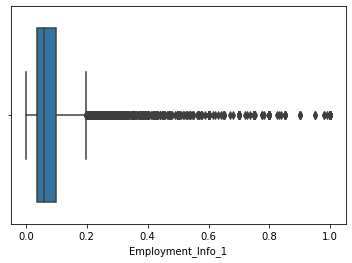

In [7]:
# Step 1: Check spread of data before imputing missing values 
plt.plot(figsize=(15,10))
sns.boxplot(data['Employment_Info_1'])


**Employment_Info_1 seems to have lots of outliers - Median should be right to impute missing values**

In [8]:
# Step 2: Replace using Median

data['Employment_Info_1'].fillna(data['Employment_Info_1'].median(),inplace=True) 
# imputing with Meadian , as there are lots of Outliers 
data['Employment_Info_1'].isna().sum()

0

<b> Imputing for Employment_info_4 </b>

<AxesSubplot:xlabel='Employment_Info_4'>

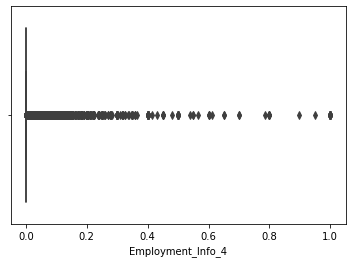

In [9]:
# Step 1: Check spread of data before imputing missing values 
plt.plot(figsize=(15,10))
sns.boxplot(data['Employment_Info_4'])

In [10]:
# Step 2: Replace using Median Employment_Info_4 seems to have lots of outliers - Median should be right to impute missing values

data['Employment_Info_4'].fillna(data['Employment_Info_4'].median(),inplace=True) 
# imputing with Meadian , as there are lots of Outliers 

data['Employment_Info_4'].isna().sum()

0

<b>Imputing for Employment_Info_6</b>

<AxesSubplot:xlabel='Employment_Info_6'>

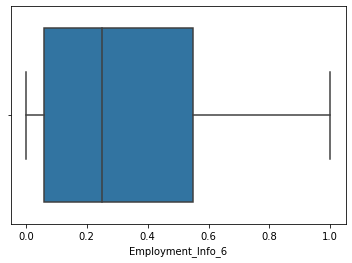

In [11]:
# Step 1: Check spread of data before imputing missing values 
plt.plot(figsize=(15,10))
sns.boxplot(data['Employment_Info_6'])

**Employment_Info_6 does not have outliers - Mean should be right to impute missing values**

In [12]:
# Step 2: Replace using Mean

data['Employment_Info_6'].fillna(data['Employment_Info_6'].mean(),inplace=True) 
# imputing with Meadian , as there are lots of Outliers 

In [13]:
data['Employment_Info_6'].isna().sum()

0

<b>Imputing for Medical_History_1</b>

<AxesSubplot:xlabel='Medical_History_1'>

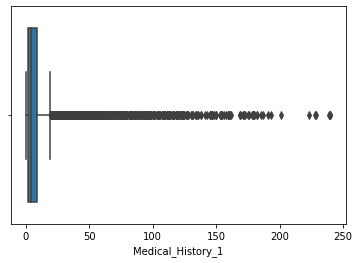

In [14]:
# Step 1: Check spread of data before imputing missing values 
plt.plot(figsize=(15,10))
sns.boxplot(data['Medical_History_1'])

**Medical_History_1 seems to have lots of outliers - Median should be right to impute missing values**

In [15]:
# Step 2: Replace using Mean

data['Medical_History_1'].fillna(data['Medical_History_1'].median(),inplace=True) 
# imputing with Meadian , as there are lots of Outliers 

<b> Dropping features with high number missing values</b>

In [16]:
# drop features with high number of missing values 
data.drop(['Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32','Family_Hist_3','Family_Hist_5','Family_Hist_2','Family_Hist_4','Insurance_History_5'],axis=1,inplace=True)

### Data Cleanup completed

### Check for balanced Target Variable distribution

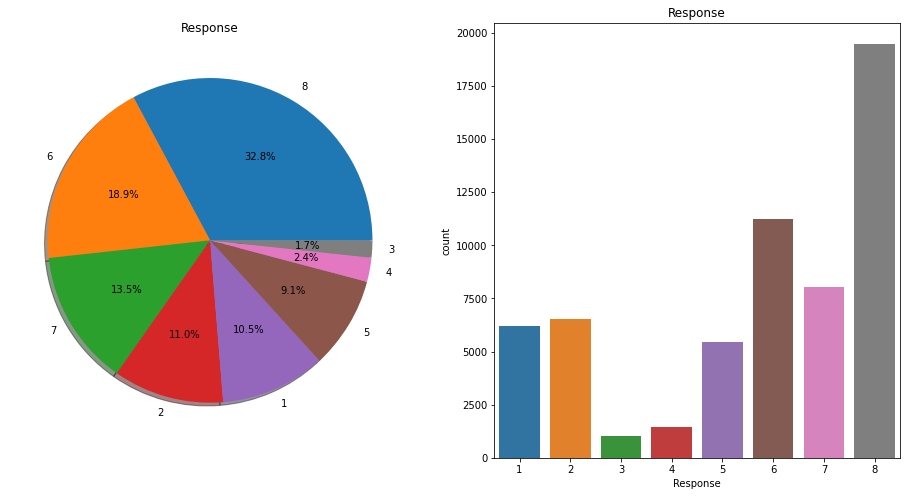

In [17]:
f,ax=plt.subplots(1,2,figsize=(16,8))
data['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=data,ax=ax[1])
ax[1].set_title('Response')
plt.show()




In [18]:
data['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

### Dataset is not balanced

Convert the problem from multiclass classification to binary classification. 

- You can modify the target variable to convert it into a binary classification problem (Response 1 to 7 as 0 (Rejected/Conditional Acceptance) and Response 8 as 1 (Accepted)), the accuracy of the new models would be better than the correct ones.

- Create a new variable 'RiskClass' 

In [19]:
def categorize_risk(r):
    if r.Response <= 7:
        return 0
    else:
        return 1
    
data['RiskClass']=data.apply(categorize_risk,axis=1)
    


In [20]:
data.RiskClass.value_counts()

0    39892
1    19489
Name: RiskClass, dtype: int64

In [21]:
data.drop('Response',axis=1,inplace=True)

data.rename(columns = {'RiskClass':'Response'}, inplace = True)

<a id="section5"></a>
---
## **5. Feature Engineering and Machine Learning**
---

- In this section, we will perform **Feature Encoding**, **Data Standardization**, and then finally **split** our **data** into train and test sets.

<a id = "Section51"></a>
###   5.1 Feature Engineering
- In this section, we will perform **transformation** over categorical features to numeric using **get_dummies()**.

In [22]:
data = pd.get_dummies(data, columns=['Product_Info_2'])
data.head()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,2,1,10,0.08,2,1,1,0.64,0.58,0.15,0.32,0.03,12,1,0.00,3,0.36,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,4.00,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5,1,26,0.08,2,3,1,0.06,0.60,0.13,0.27,0.00,1,3,0.00,2,0.00,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,5.00,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,1,26,0.08,2,3,1,0.03,0.75,0.29,0.43,0.03,9,1,0.00,2,0.03,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,10.00,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,1,10,0.49,2,3,1,0.16,0.67,0.21,0.35,0.04,9,1,0.00,3,0.20,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.00,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,8,1,26,0.23,2,3,1,0.42,0.65,0.23,0.42,0.03,9,1,0.00,2,0.05,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,4.00,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Data Standardization

- Here we will perform standardization over the input features.

In [23]:
data.Response.value_counts()

0    39892
1    19489
Name: Response, dtype: int64

In [24]:
X = data.drop(['Response'], axis=1)
y = data['Response']

In [25]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

####  Data Preparation

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0, stratify=y)
print('Shape of X is :', X_train.shape)
print('Shape of y is :',X_test.shape)

Shape of X is : (44535, 136)
Shape of y is : (14846, 136)


In [27]:
X.isnull().sum()[data.isnull().sum() !=0]

Series([], dtype: int64)

<a id = "Section52"></a>
### **5.2 Model Development without PCA**

In [28]:
# Initialize classifiers
# Using a Decision Tree classifier with GridSearchCV


log_clf = LogisticRegression(random_state=0, class_weight='balanced', n_jobs=-1, penalty="none")
dt_clf = DecisionTreeClassifier(random_state = 0, criterion='entropy', max_depth=10)
dtgs_clf=GridSearchCV(dt_clf,{'max_depth':range(1,20,2)},cv=10,scoring='accuracy',n_jobs=-1)
rf_clf=RandomForestClassifier(criterion='entropy',
                                n_estimators=4,
                                random_state = 0,
                                max_depth=7,
                                min_samples_split=5,
                                min_samples_leaf=4,
                                max_leaf_nodes=5,
                                n_jobs=-1,
                                )


sv_clf = SVC(kernel = 'sigmoid',random_state=0, probability=True, class_weight='balanced')
knn_clf = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)

In [29]:

def build_models(X_train, y_train,X_test, y_test):
    #%%time
    # Intialize a list of classifier objects
    clf_list = [log_clf, dt_clf, dtgs_clf, rf_clf,knn_clf,sv_clf]
    import time
    # Create an empty list to append scores and classifier name
    train_score = []
    test_score = []
    clf_names = []
    timetaken =[]
    test_accuracy=[]
    train_accuracy=[]
    # Train classifier over train data and append scores to empty list
    for clf in clf_list:
      # Fit the train data over the classifier object
       # begin = time.time()
        clf.fit(X_train, y_train)
        y_pred =clf.predict(X_test)
        y_train_pred=clf.predict(X_train)
        #end = time.time()
        #timetaken.append(end - begin)
        test_accuracy.append(f1_score(y_test, y_pred))
        train_accuracy.append(f1_score(y_train,y_train_pred))

      # Append train and test score to the empty list
        #train_score.append(np.round(a=clf.score(X_train, y_train), decimals=2))
        #test_score.append(np.round(a=clf.score(X_test,y_test), decimals=2))
        clf_names.append(clf.__class__.__name__)
        #report_train = classification_report(y_train, y_train_pred)
        #report_test = classification_report(y_test, y_pred)
        #print(clf.__class__.__name__)
        #print(f1_score(y_test, y_pred)) 
        
        #print('                    Training Report          ')
        #print(report_train)
        #print('                    Testing Report           ')
        #print(report_test)
       # print('Success 1!')
       
    # Create a recall dataframe from recall and names list
    score_frame = pd.DataFrame(data={'F1 score Train ': train_accuracy, 'F1 score Test ': test_accuracy}, index=clf_names)
   # score_frame = pd.DataFrame(data={'F1 score Train': train_accuracy, 'F1 score Test ': test_accuracy,'Train Score': train_score, 'Test score': test_score}, index=clf_names)

# View the recall of all the classifiers
    print(score_frame.transpose())
print('Success!')

Success!


In [30]:
build_models(X_train, y_train,X_test, y_test)

                 LogisticRegression  DecisionTreeClassifier  GridSearchCV  \
F1 score Train                 0.74                    0.73          0.74   
F1 score Test                  0.74                    0.72          0.73   

                 RandomForestClassifier  KNeighborsClassifier  SVC  
F1 score Train                     0.00                  0.70 0.66  
F1 score Test                      0.00                  0.62 0.69  


<a id = "Section53"></a>
### 5.3  PCA

In [31]:

from sklearn.preprocessing import StandardScaler    
def generate():
    standardized = StandardScaler()
    standardized.fit(X)
    return standardized.transform(X)
X = generate()


In [32]:
from sklearn.decomposition import PCA
pca = PCA(0.95,random_state=0).fit(X)

In [33]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3) * 100)

Text(0.5, 1.0, 'Principal Component Analysis')

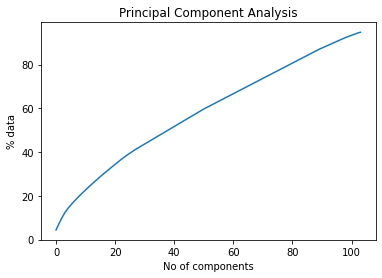

In [34]:
plt.plot(var)
plt.xlabel("No of components")
plt.ylabel("% data")
plt.title("Principal Component Analysis")

In [35]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

104 components explain 95% of the variation in data


In [36]:
pca = PCA(n_components=103, random_state=0)
pca.fit(X)

X_pca = pca.transform(X_scaled)
#pca









<a id = "Section54"></a>
### 5.4  Model Development and Evaluation post PCA

In [37]:
def split(X,y):
    return train_test_split(X,y, test_size=0.20, random_state=25, shuffle=True)

X_pca_train, X_pca_test, y_train, y_test=split(X_pca,y)

In [38]:
build_models(X_pca_train, y_train,X_pca_test, y_test)

                 LogisticRegression  DecisionTreeClassifier  GridSearchCV  \
F1 score Train                 0.73                    0.71          0.68   
F1 score Test                  0.73                    0.62          0.62   

                 RandomForestClassifier  KNeighborsClassifier  SVC  
F1 score Train                     0.03                  0.70 0.65  
F1 score Test                      0.03                  0.62 0.67  


In [39]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(X_pca_train, y_train)

GaussianNB()

In [40]:
gnb_y_pred =gnb.predict(X_pca_test)
gnb_y_train_pred=gnb.predict(X_pca_train)

In [45]:
gnb_accuracy = f1_score(y_test, gnb_y_pred)
print('F1 score for the Naive Bayes model:', gnb_accuracy)

F1 score for the Naive Bayes model: 0.5240611961057025


In [42]:
y_test.head()

47455    1
18901    1
56273    0
58640    0
41024    0
Name: Response, dtype: int64

In [43]:
f1_score(y_test, gnb_y_pred)

0.5240611961057025

In [44]:
f1_score(y_train, gnb_y_train_pred)

0.5263446510990267

<a id="conclude"></a>
# 6. Conclusion

Features selection, feature extraction are not much helpful given the information at hand. 
Converting the target variable to binary helped in building better performing model
With the given features, Logistic Regression  model can be used to evaluate the risk. 

Next step, 
Prudential should check for adding data samples or by creating features in the dataset 
Evaluate techniques to handle imbalanced data set
Apply advance machine learning algorithms to further improve performance

